# Importing required libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

importing data set

In [54]:
titanic_df = pd.read_csv("Titanic-Dataset.csv")

 Check for missing values

In [55]:

print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Visualize the age distribution

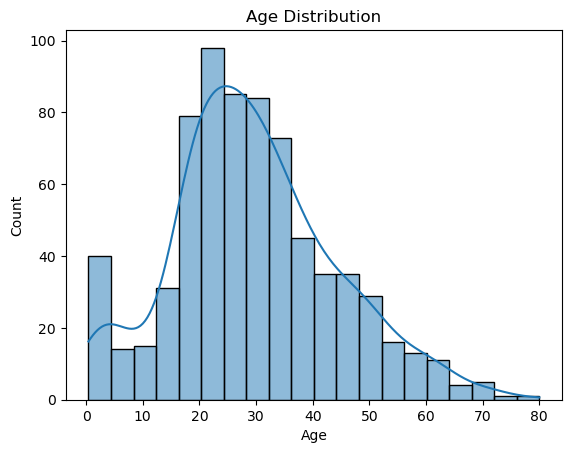

In [56]:

sns.histplot(titanic_df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

OUTLIER DETECTION

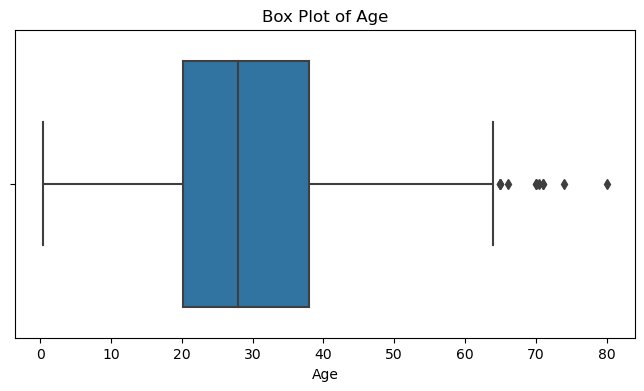

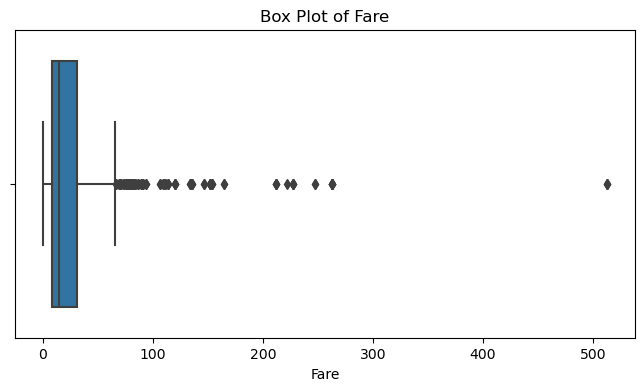

Outliers in Age:
     PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
280          281         0       3                      Duane, Mr. Frank   
456          457         0       1             Millet, Mr. Francis Davis   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33

In [57]:
# Define the columns for which you want to perform outlier detection
columns_to_check = ['Age', 'Fare']

# Create box plots to visualize outliers
for column in columns_to_check:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=titanic_df[column])
    plt.title(f"Box Plot of {column}")
    plt.show()

# Calculate the IQR (Interquartile Range) for each column
for column in columns_to_check:
    Q1 = titanic_df[column].quantile(0.25)
    Q3 = titanic_df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = titanic_df[(titanic_df[column] < lower_bound) | (titanic_df[column] > upper_bound)]
    
    # Print the outliers (if any)
    if not outliers.empty:
        print(f"Outliers in {column}:")
        print(outliers)
    else:
        print(f"No outliers found in {column}")


Splitting Dependent and Independent Variables

In [58]:

X = titanic_df.drop(['Survived'], axis=1)  # Independent variables/features
y = titanic_df['Survived']  # Dependent variable/target

# Display the shape of X and the first few rows of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nFirst few rows of X:")
print(X.head())
print("\nFirst few rows of y:")
print(y.head())

Shape of X: (891, 11)
Shape of y: (891,)

First few rows of X:
   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  

First few rows of y:
0    0
1

PERFORM ENCODING

In [59]:
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])
X = pd.get_dummies(X, columns=['Embarked'], prefix=['Embarked'])
print("Encoded and Scaled Data:")
print(X.head())

Encoded and Scaled Data:
   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch            Ticket     Fare Cabin  Embarked_C  \
0    1  22.0      1      0         A/5 21171   7.2500   NaN           0   
1    0  38.0      1      0          PC 17599  71.2833   C85           1   
2    0  26.0      0      0  STON/O2. 3101282   7.9250   NaN           0   
3    0  35.0      1      0            113803  53.1000  C123           0   
4    1  35.0      0      0            373450   8.0500   NaN           0   

   Embarked_Q  Embarked_S  
0           0           1  
1    

FEATURE SCALING

In [60]:
# Before feature scaling (print the first few rows)
print("Before Feature Scaling:")
print(X[['Age', 'Fare']].head())

# Perform Feature Scaling
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

# After feature scaling (print the first few rows)
print("\nAfter Feature Scaling:")
print(X[['Age', 'Fare']].head())

Before Feature Scaling:
    Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500

After Feature Scaling:
        Age      Fare
0 -0.530377 -0.502445
1  0.571831  0.786845
2 -0.254825 -0.488854
3  0.365167  0.420730
4  0.365167 -0.486337


SPLITTING DATA INTO TRAIN AND TEST

In [61]:
# Splitting Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


SHAPES OF RESULTING DATA SPLIT

In [62]:
# Check the shapes of the resulting data splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 13)
X_test shape: (179, 13)
y_train shape: (712,)
y_test shape: (179,)
